# Define problem
Trong notebook này chúng ta sẽ đưa ra chiến lược cuối cùng về chiến lược mở rộng của công ty, có vài ba câu hỏi như sau:
1. Chúng ta có nên mở rộng không? Và bắt đầu chiến dịch khi nào?
2. Khi triển khai chiến dịch chúng ta nên tập trung ở đâu?
3. Chiến lược mở rộng của chúng ta là như thế nào?

Túm lại chúng ta phải giải quyết câu hỏi trên. Ừm trước khi đi vào giải quyết vấn đề thì cũng có một chỗ cần phải suy nghĩ thêm.
Như là điều kiện, yếu tố gì khiến chúng ta nghĩ là chúng ta sẽ mở rộng công ty sản xuất, kinh doanh bơ?

Ừm, thì các đầu óc lỗi lạc từ thời xa xưa cũng có câu: "Thiên thời, địa lợi, nhân hòa" khi cân nhắc, tiên đoán phát triển sự vật sự việc, hoặc chóp lấy thời cơ để đoạt ngôi thiên tử. À cái này hơi xa chút, nhưng quay lại là gồm 3 yếu tố:

+ Thiên thời: hay còn gọi là thời vụ, tức là khoảng thời gian vàng mà việc chúng ta làm đang gặp môi trường lý tưởng nhất và chúng ta cần phải nắm lấy thời cơ này mà hành động để phát triển và mở rộng. Về lại trang trại bơ, à công ty bơ hay là trang trại bơ, thì khoảng thời gian vàng của chúng ta bắt đầu là để bán bơ là vào đầu năm 2018 đến giữa năm. Chỉ trong vòng 6 tháng tổng số lượng bán của chúng ta đã lên đến 12tr quả gần gấp đôi 12 tháng trong các năm trước. Có thể nhìn vào ảnh bên dưới.

![Golden Year](https://github.com/minhquan23102000/AvocadoFramingExtend_Medium_DataScientProject_Regression_TimeSeriesAnalysis/blob/7f53c9152ce1627e0c7be889646b36dcdbdad484/imgs/golden_year.png?raw=True "The golden year")

Vậy nên với kết quả này, công ty mẹ của chúng ta có lẽ đã quyết định lên kế hoạch mở rộng công ty của mình. Tuy nhiên chúng ta sẽ thử dùng time series forecast nhìn về tương lai để thấy rõ hơn.

+ Địa lợi: hay còn gọi là địa điểm, tài nguyên, vị thế, nơi đang đứng đang có lợi cho chúng ta. Địa lợi thì lúc nào cũng nằm ngay ở quê hương của mình (California). Đương nhiên hiện tại chúng ta chỉ cân nhắc trong lãnh thổ của nước Mỹ. Tuy nhiên để mở rộng lãnh thổ của mình, thì điều di chuyển sang nơi ta không mạnh là điều bắt buộc. Và qua các phân tích của phần 1 (dự đoán giá bơ) chúng ta đã tìm được các địa điểm tìm năng như là: SanDiego, SanFrancisco, HartFoldSpringField. Bằng chứng là nhìn sơ đồ sau đây.

![Top states](https://github.com/minhquan23102000/AvocadoFramingExtend_Medium_DataScientProject_Regression_TimeSeriesAnalysis/blob/7f53c9152ce1627e0c7be889646b36dcdbdad484/imgs/top_states.jpg?raw=True "top states")

+ Nhân hòa: này là vấn đề nhân sự trong nội bộ công ty và các chiến lược truyền thông của phía công ty. Đây không phải là vấn đề mà thầy bói cần quản, nên chúng ta bỏ qua.



## Chuẩn bị thư viện

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import matplotlib.dates as mdates

#analysys
from statsmodels.tsa.seasonal import seasonal_decompose
from prophet import Prophet

#Custom CSS for data visualization
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.titlesize': 'x-large',
          'figure.figsize': (15, 10),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

Importing plotly failed. Interactive plots will not work.


# Các bước triển khai:

#### Đầu tiên chúng ta sẽ giải quyết câu hỏi số 1: Chúng ta có nên mở rộng không và bắt đầu khi nào là hợp lý?

In [2]:
#Load data
data = pd.read_csv('avocado.csv', index_col = 0)
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Một bộ data quen thuộc nên chúng ta cũng không cần giới thiệu làm quen nhau chi nữa.

Để hiểu rõ hơn về thiên thời của doanh nghiệp. Chúng ta nên cân nhắc nhìn vào doanh thu của phía đó mà tiên đoán, nhưng với bộ dữ liệu đã cho trên thì không có trường giá trị này. Tuy nhiên, có một thuộc tính khá tương đồng với doanh thu, đó là Total Volume: tổng số lượng quả đã bán ra. Thuộc tính này không chỉ tượng trưng cho doanh thu phía doanh nghiệp không, mà còn tượng trưng nhu cầu ở phía khách hàng. "Nhất tiễn lưỡng điêu"

### Đầu tiên nhìn toàn bộ nước Mỹ

In [9]:
#Select region == total us
df_totalus = data[data['region'] == 'TotalUS']
#Select needed columns
df_totalus = df_totalus[['Date', 'Total Volume']]
df_totalus.columns = ['ds', 'y']
df_totalus.loc[:,'ds'] = pd.to_datetime(df_totalus['ds'])
#Group by date, who analysis cover all two types of hass avocado
df_totalus = df_totalus.groupby(by='ds', ).sum()
#Scaling data for boost performance and readability
df_totalus['y'] = df_totalus['y']/10e6 #Scale to million
df_totalus.head()

,y
ds,
2015-01-04,3.193719
2015-01-11,2.973307
2015-01-18,2.975658
2015-01-25,2.902668
2015-02-01,4.539636


In [12]:
#Reset index for fbprophet
df_totalus = df_totalus.reset_index()
df_totalus.head()

,ds,y
0,2015-01-04,3.193719
1,2015-01-11,2.973307
2,2015-01-18,2.975658
3,2015-01-25,2.902668
4,2015-02-01,4.539636


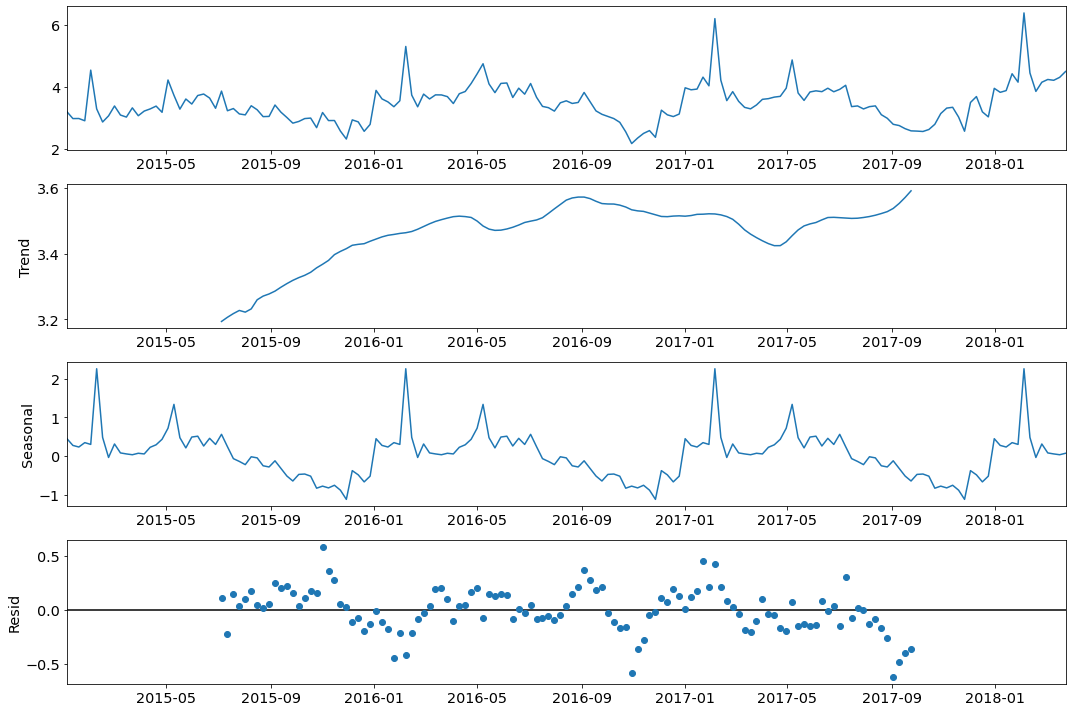

In [15]:
#Seasonal decompose analysys
seasonal_decompose(df_totalus.set_index('ds') , model = 'add').plot();

Tương tự như price, số lượng bán cũng có tính chất theo mùa và tăng mạnh vào đầu năm 2017.
Cũng có một số điểm biến động như vào tháng 10 năm 2016, tháng 9 năm 2017. Là mùa thu trong năm

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


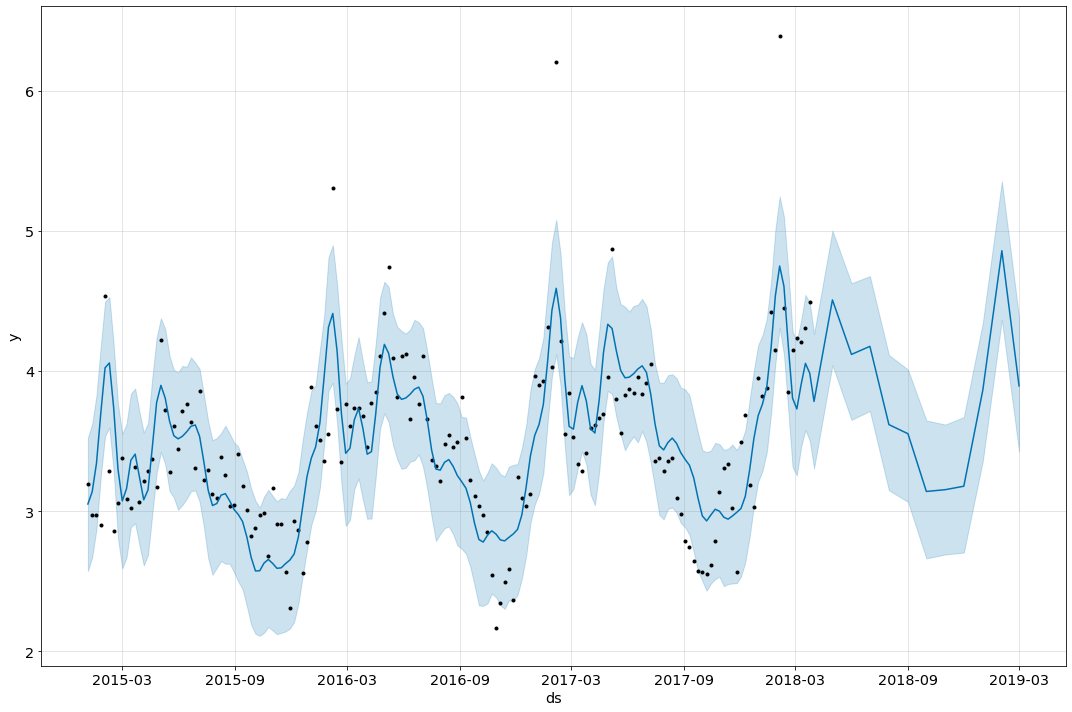

In [16]:
#Fbprophet
m = Prophet()
m.fit(df_totalus)
#Create future stream
future = m.make_future_dataframe(periods=12, freq='MS', include_history=True)
#Forecast the unknown
forecast = m.predict(future)
#Take a look at the graph
m.plot(forecast, figsize=(15,10));

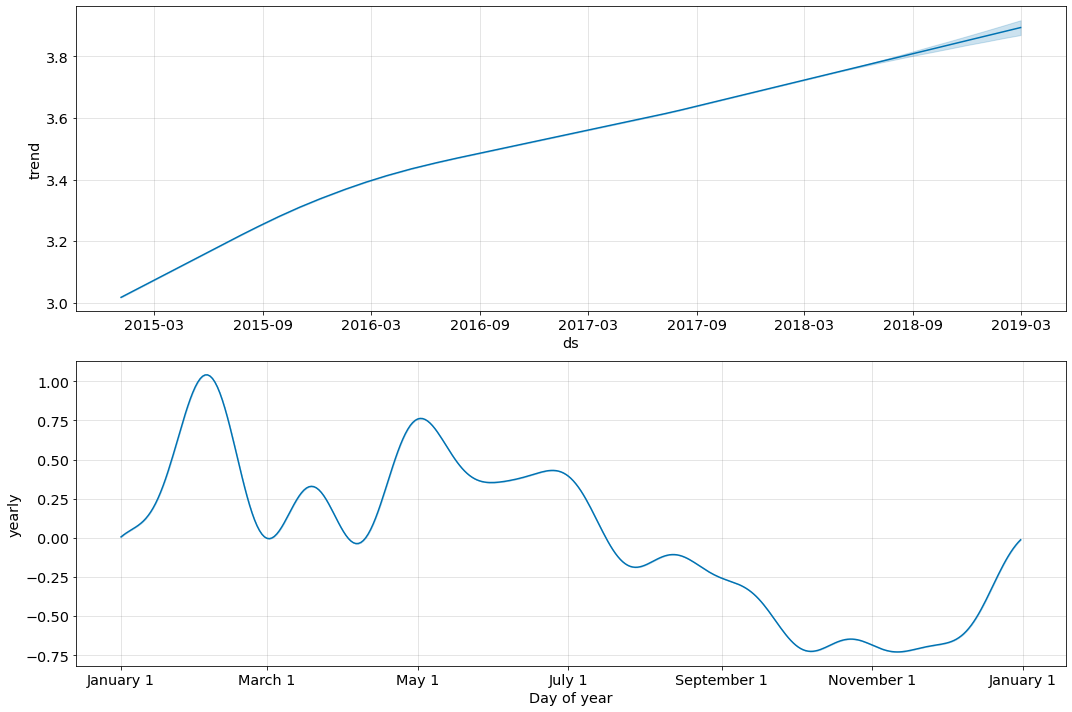

In [17]:
m.plot_components(forecast, figsize=(15,10));

Từ hai biểu đồ trên chúng ta có thể kết luận là chúng ta nên mở rộng chiến dịch. Vì tổng quả bơ bán được trong năm tiếp theo sẽ tăng mạnh.
Và chúng ta nên triển khai chiến dịch này vào đầu mùa thu năm 2018 (các sự kiện, khuyễn mãi, chương trình, ...) để tăng lượt tương tác sau đó chúng ta sẽ tung đoàn quyết định vào tháng 1 (đầu mùa xuân) năm 2019.

## Câu hỏi số 2: Khi triển khai chiến dịch chúng ta nên tập trung tại bang nào?

### 3 địa điểm: SanDiego, SanFrancisco, HartFoldSpringField.

In [20]:
#Create a function
def fortune_telling(data, state, y):
    #Select region
    df = data[data['region'] == state]
    #Select needed columns
    df = df[['Date', y]]
    df.columns = ['ds', 'y']
    df.loc[:,'ds'] = pd.to_datetime(df['ds'])
    #Group by date, who analysis cover all two types of hass avocado
    df = df.groupby(by='ds').sum()
    #Scaling data for boost performance and readability
    df['y'] = df['y']/10e6 #Scale to million
    #Reset index for fbprophet
    df = df.reset_index()
    #Fbprophet
    m = Prophet()
    m.fit(df)
    #Create future stream
    future = m.make_future_dataframe(periods=12, freq='MS', include_history=True)
    #Forecast the unknown
    forecast = m.predict(future)
    #Take a look at the graph
    m.plot(forecast, figsize=(15,10))
    plt.show()
    m.plot_components(forecast, figsize=(15,10))
    plt.show()

### SanDiego

Chúng ta sẽ nhìn vào giá bán hơn là total volume. Vì chúng ta chưa triển khai mở rộng ở nơi này, nên total volume sẽ không cho ra cái nhìn chính xác. Ngoài ra nhìn vào giá của quả bơ sẽ cho chúng ta cái nhìn về nhu cầu, cũng như độ cung ở phía doanh nghiệp của mình.

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


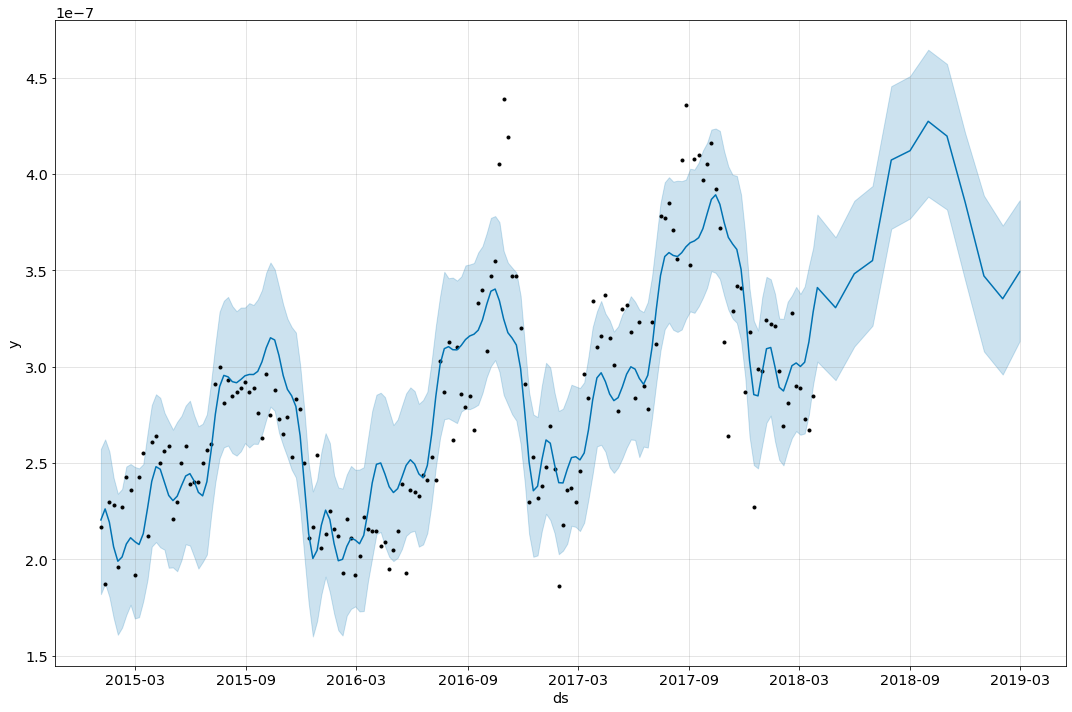

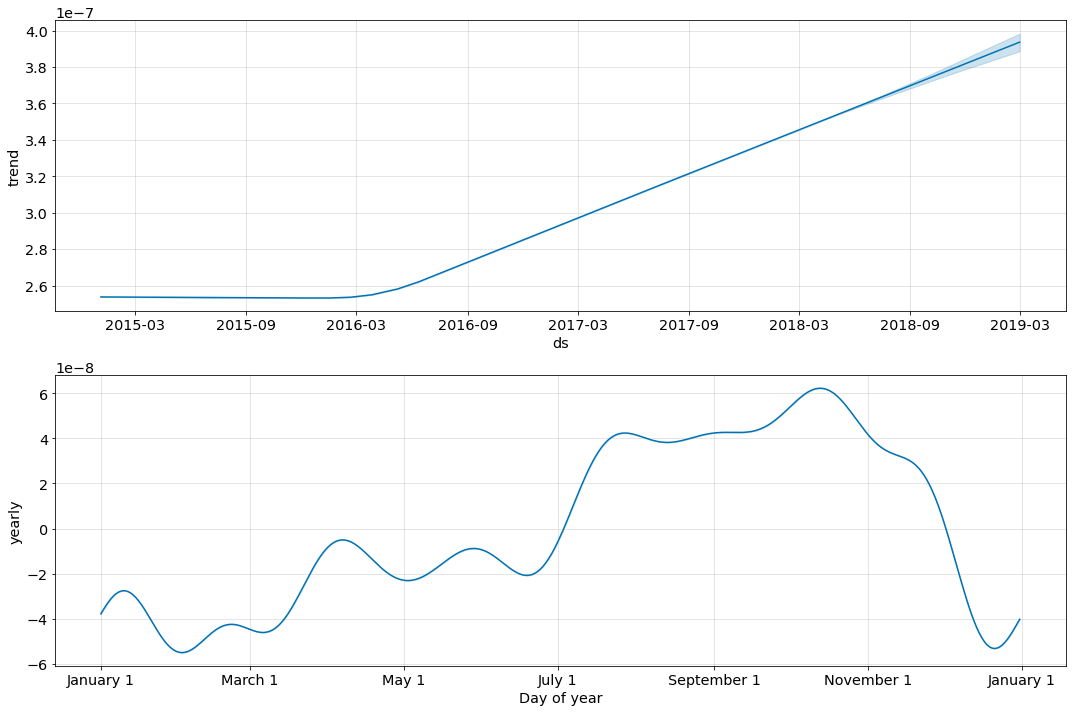

In [21]:
fortune_telling(data, state = 'SanDiego', y = 'AveragePrice')

Xu hướng mùa cũng nằm bên trong xu hướng chung của Mỹ. Và qua biểu đồ trên chúng ta thấy rõ, xu hướng sẽ tăng cực mạnh từ đầu năm 2016.

## SanFrancisco

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


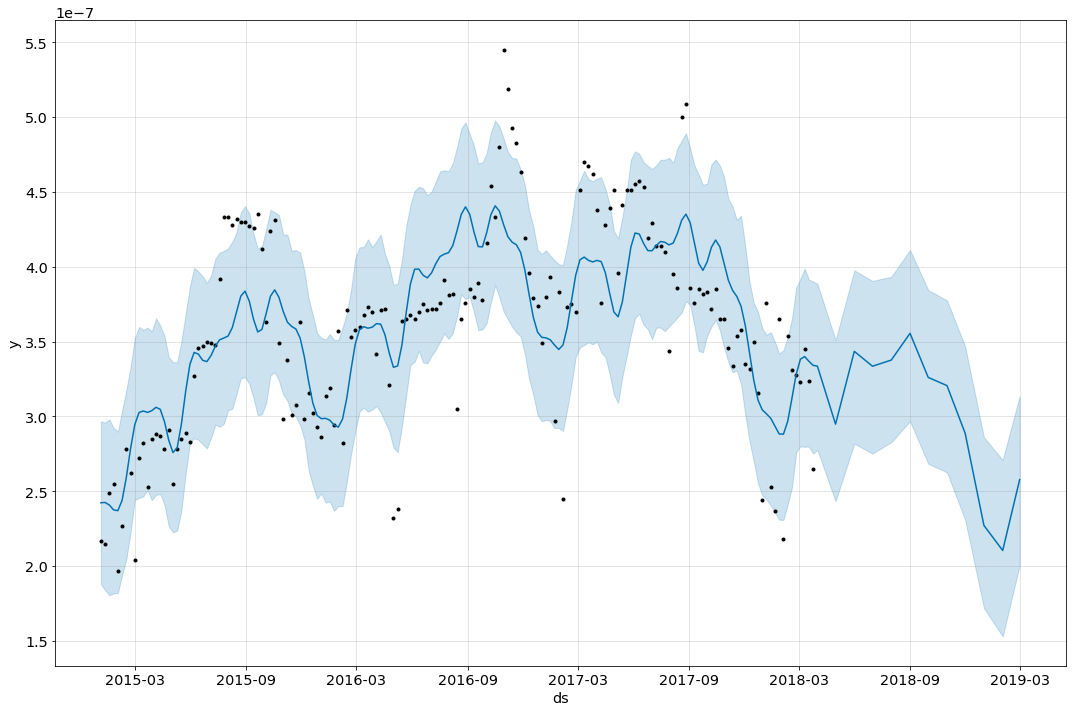

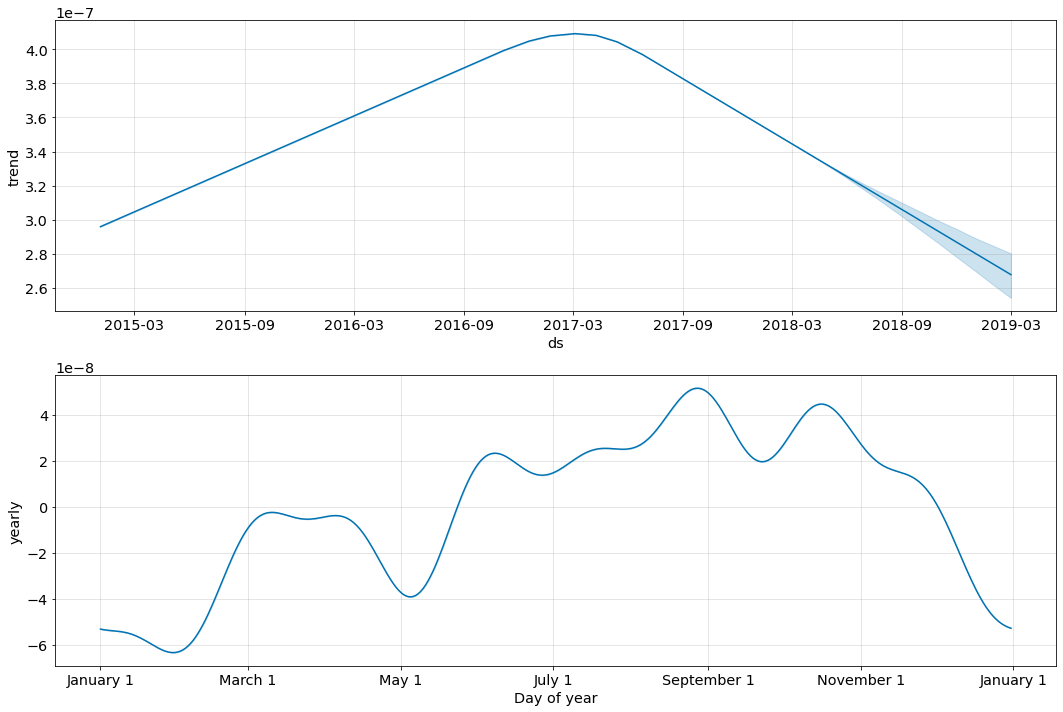

In [22]:
fortune_telling(data, state = 'SanFrancisco', y = 'AveragePrice')

Vậy là SanFrancisco, có xu hướng giảm trong những năm tới. Chúng ta loại bỏ bang này ra các nơi tiềm năng để triển khai chiến dịch của mình.

### Bang cuối cùng: HartfordSpringfield

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


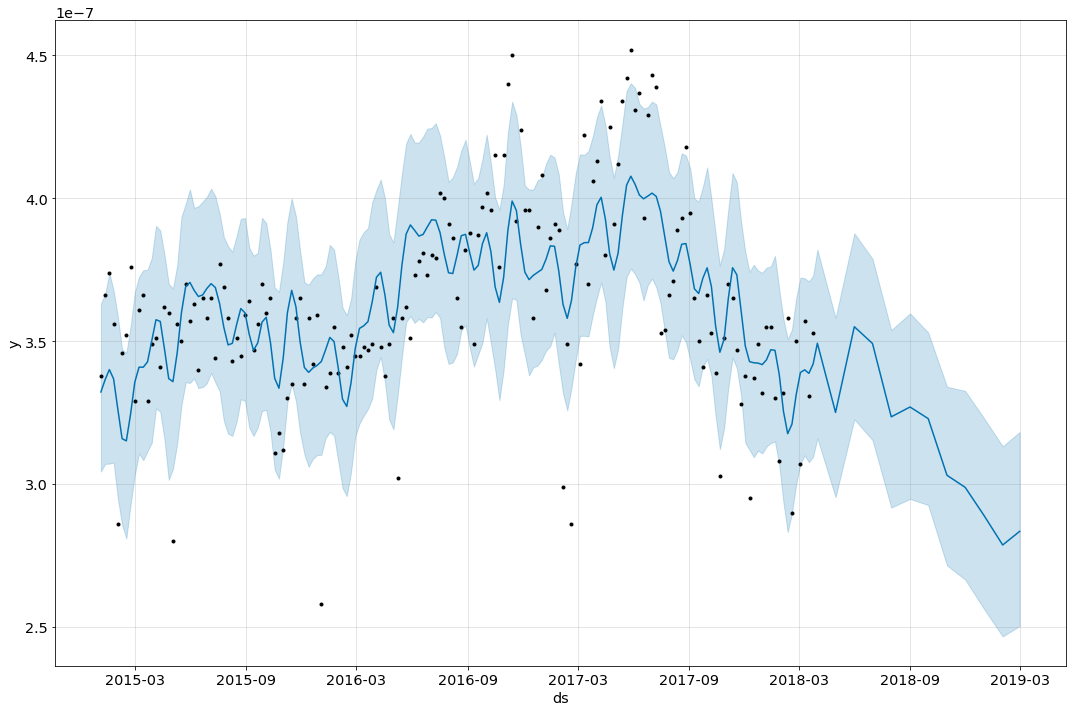

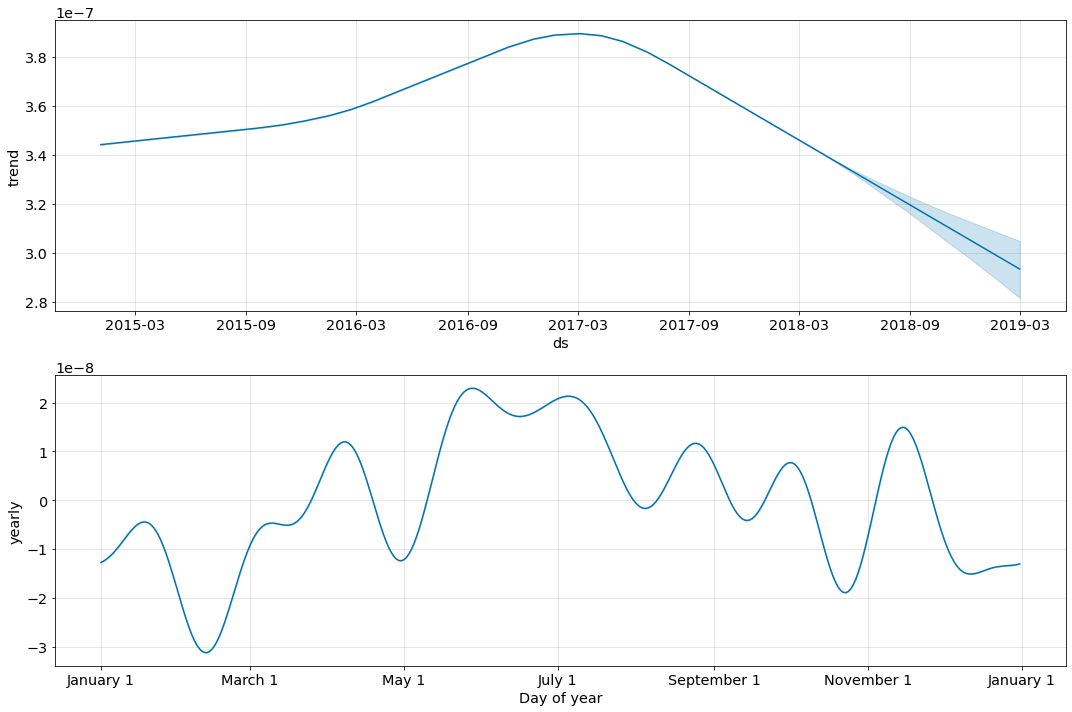

In [24]:
fortune_telling(data, state = 'HartfordSpringfield', y ='AveragePrice')

Xu hướng theo mùa có vẻ hơi bị lẹch khoảng 2 tháng so với thông thường. Tuy vậy trend ở bang này cũng sẽ giảm mạnh trong năm tới. Chúng ta loại bỏ bang này khỏi ra nơi tiềm năng.

### Ghé thăm NewYork

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


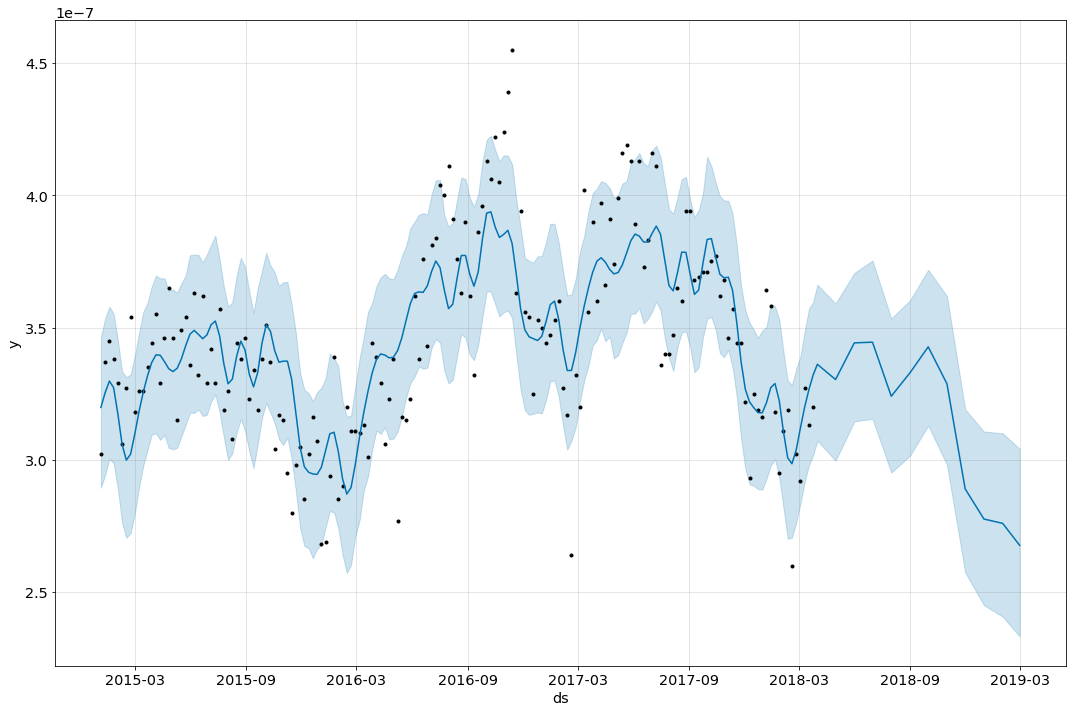

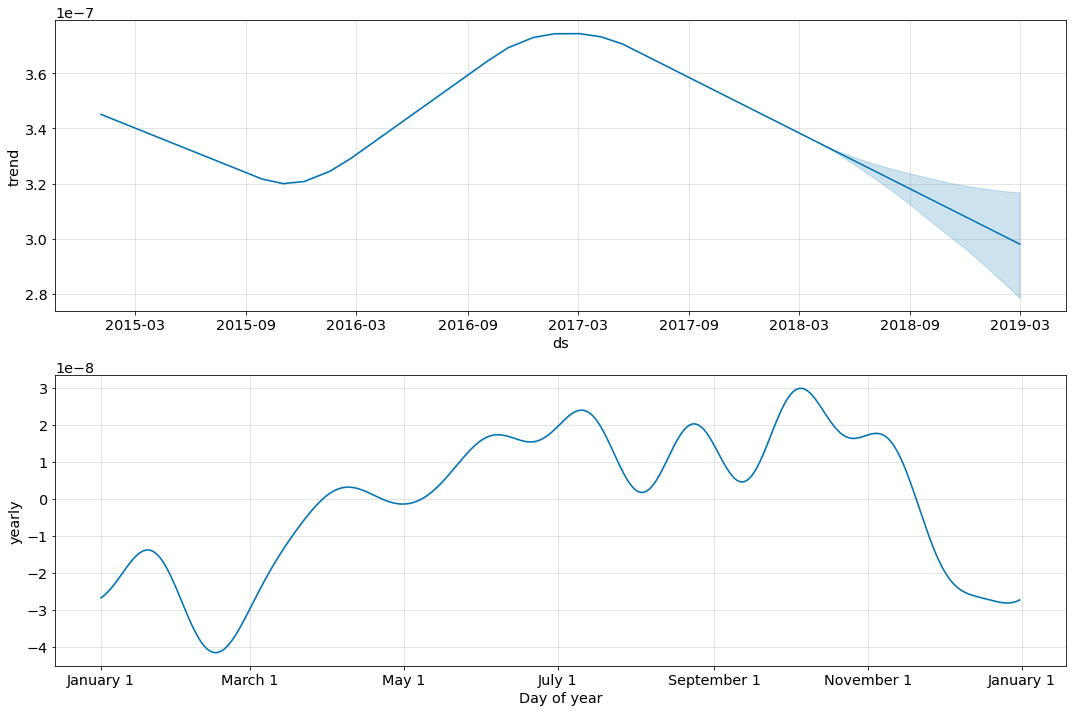

In [25]:
fortune_telling(data, state = 'NewYork', y ='AveragePrice')

Xu hướng cũng bị giảm mạnh trong năm tới

### Thử nhìn Sacramento

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


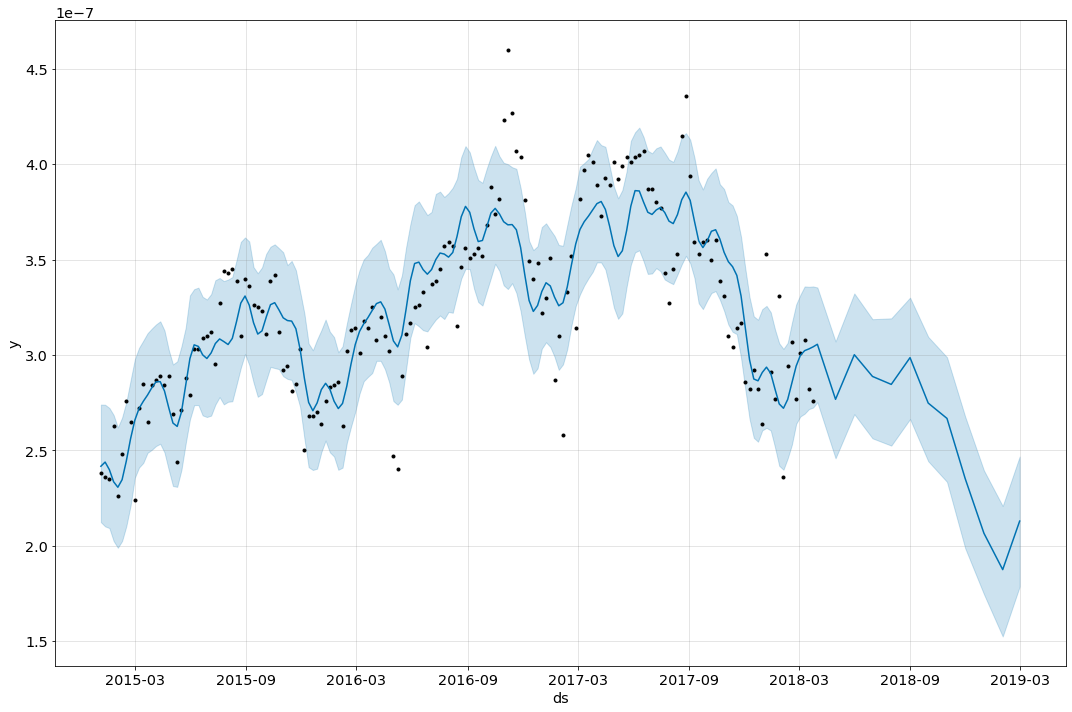

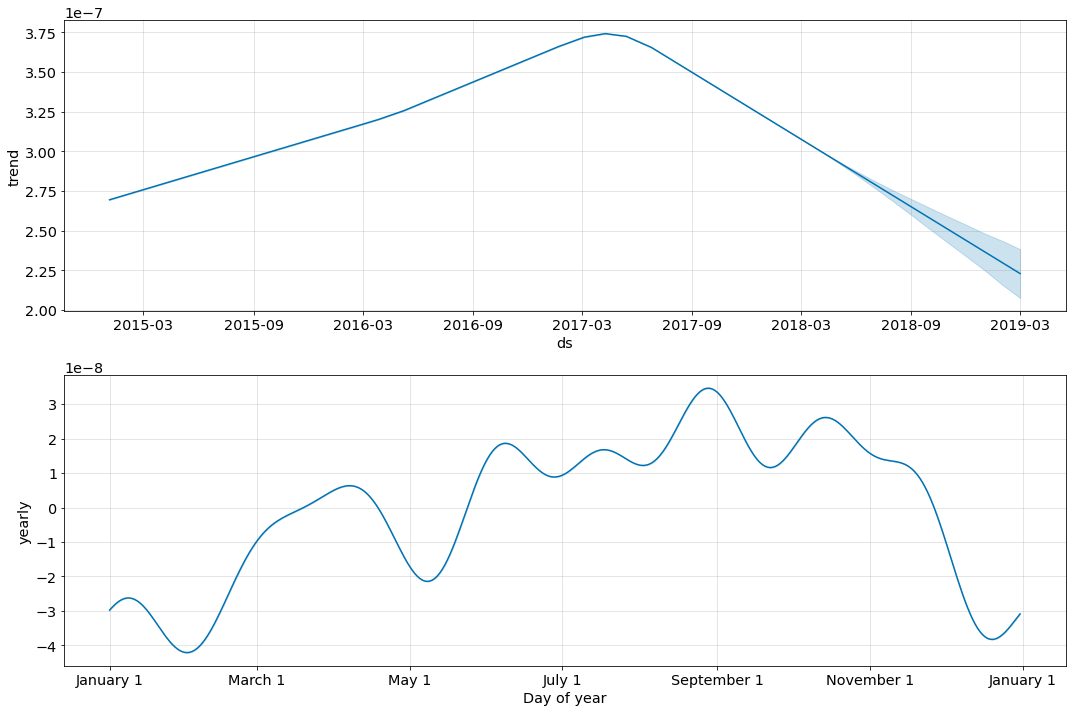

In [26]:
fortune_telling(data, state = 'Sacramento', y ='AveragePrice')

Xu hướng nơi này cũng giảm mạnh trong các năm tới.

## Kết luận cuối cùng:

Vậy bang SanDiego là bang tiềm năng nhất để triển khai hoạt động của chúng ta.

## Câu hỏi số 3: Chiến lược của chúng ta là gì?

Như đã đề cập ở part một, chúng ta nên tập trung vào chất lượng của quả bơ nhiều hơn, vì khách hàng đi mua bơ thường mua với số lượng nhỏ. Chúng ta có thể nhìn biểu đồ sau đây

![Which Bags will i buy?](https://github.com/minhquan23102000/AvocadoFramingExtend_Medium_DataScientProject_Regression_TimeSeriesAnalysis/blob/7f53c9152ce1627e0c7be889646b36dcdbdad484/imgs/how_much_buy.png?raw=True)



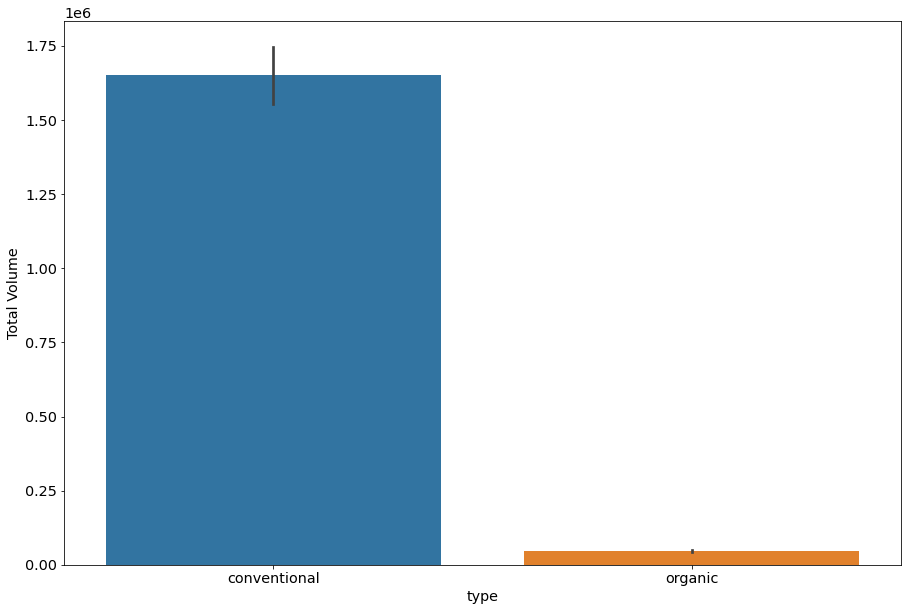

In [28]:
#Total volume from each type
sns.barplot(data = data, x = 'type', y = 'Total Volume');

Ngoài ra chúng ta nên tăng mạnh sản xuất bơ hữa cơ nhiều hơn vì lượng nhu cầu cho bơ hữa cơ sẽ lớn hơn. Cũng như đã có đề cập ở trên, chúng ta nên tập trung vào chất lượng thay vì số lượng. Chúng ta có thể nhìn qua biểu đồ sau đây để hiểu rõ hơn về lượng nhu cầu của bơ.

![Avocado type](https://github.com/minhquan23102000/AvocadoFramingExtend_Medium_DataScientProject_Regression_TimeSeriesAnalysis/blob/7f53c9152ce1627e0c7be889646b36dcdbdad484/imgs/best_avocado_type.png?raw=True)

Và cuối cùng, như đã phân tích, lượng mua và giá bán sẽ thay đổi theo mùa. Điểm thay đổi là vào đầu mùa thu, khi số lượng bơ giảm mạnh, giá thành tăng cao tuy nhiên số lượng bán cũng sẽ giảm. Và tăng mạnh số lượng bán khi hết mùa đông, và giá cả giảm mạnh cũng vào khoảng thời gian này. Với xu hướng đó, chúng ta nên cân nhắc mở chiến dịch vào mùa thu, để chuẩn bị ra đoàn quyết định cho năm mới.

### Những điều trình bày ở trên chỉ mang tính chất gợi ý và chỉ dẫn.

Đương nhiên, trước khi cân nhắc những gì trình bày ở đây là đúng, chúng ta phải qua nhiều kiểm chứng và nghiên cứu khác như là:
+ Công ty của chúng ta hiện có doanh thu như thế nào trong những năm qua?
+ Trang trại bơ chúng ta hoạt động như thế nào?
+ Quy trình sản xuất bơ ra sao?
+ Điều kiện thời tiết, địa hình nơi chúng ta muốn mở rộng?
+ Điều kiện kinh tế, xã hội, dân cư, văn hóa nơi chúng ta muốn mở rộng?
+
Và các yếu tố khác ảnh hưởng đến sự thành công của dự án, đương nhiên nó không chỉ giới hạn qua vài cái nhìn về giá của quả bơ, hoặc tổng số lượng bán của quả bơ. Nhưng nhìn với dữ liệu đã được cung cấp cho chúng ta, thì có lẻ như họ cũng không yêu cầu chúng ta phải có cái nhìn quá xa về vấn đề này. Vậy nên bài toán dừng ở đây cũng đã phần nào đáp ứng yêu cầu được đưa ra từ lúc đầu.